In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

C:\Users\670258675\Anaconda3\envs\tabular_predictive\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
df = fetch_california_housing()

In [4]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
print(df.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
print(df.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [8]:
print(df.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### Preparing the dataset

In [9]:
dataset=pd.DataFrame(df.data, columns=df.feature_names)

In [10]:
dataset['Price'] = df['target']

In [11]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [15]:
dataset.corrwith(dataset['Price'])

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
Price         1.000000
dtype: float64

In [16]:
features = dataset.loc[:, ~dataset.columns.isin(['Price'])].columns

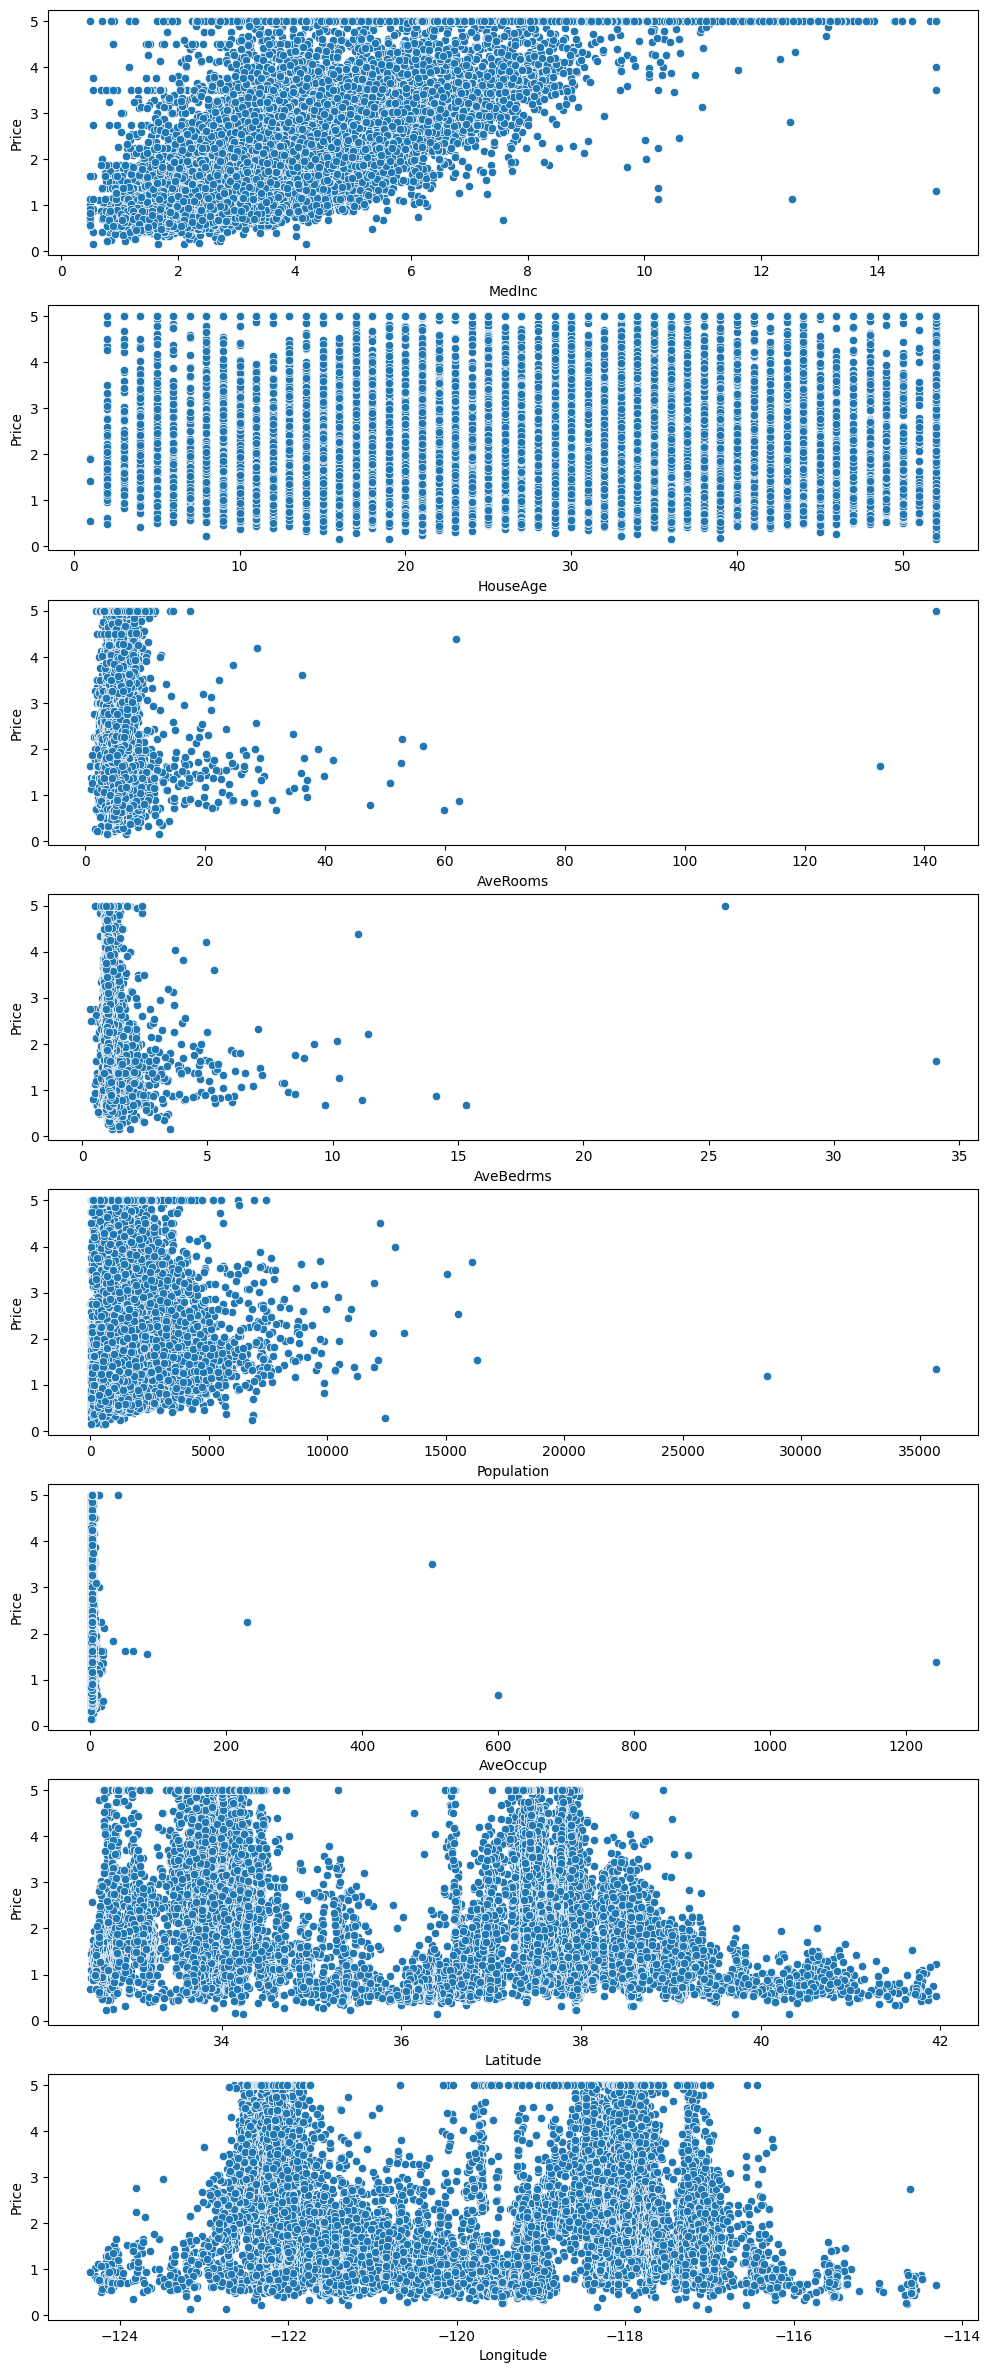

In [17]:
fig, ax = plt.subplots(8, 1, figsize = (12, 30))

for ind, val in enumerate(features):
    sns.scatterplot(x=dataset[val], y=dataset['Price'], ax=ax[ind])

In [18]:
## Independent and Dependent features

X=dataset[features]
y=dataset['Price']

In [19]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [21]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)
print(f'Regression coef : {regression.coef_}')
print(f'Regression intercept : {regression.intercept_}')
print(f'Regression parameters : {regression.get_params()}')

y_pred = regression.predict(X_test)


Regression coef : [ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]
Regression intercept : 2.0692396089424165
Regression parameters : {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


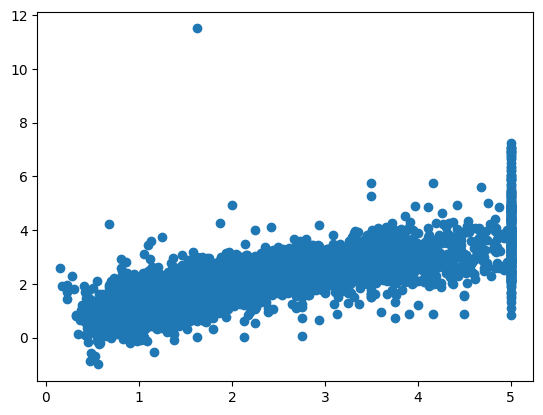

In [25]:
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred)

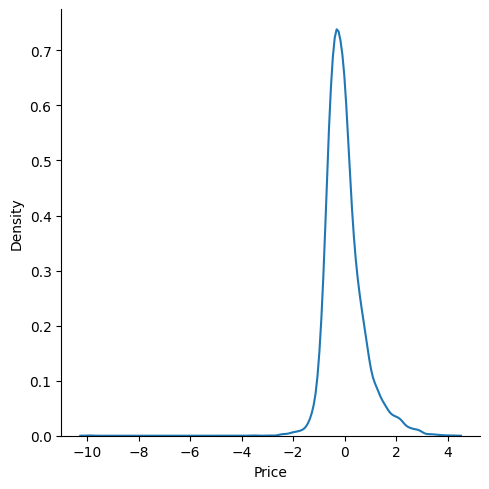

In [26]:
## Residuals
residuals=y_test-y_pred

## Plot this residuals 
sns.displot(residuals,kind="kde")

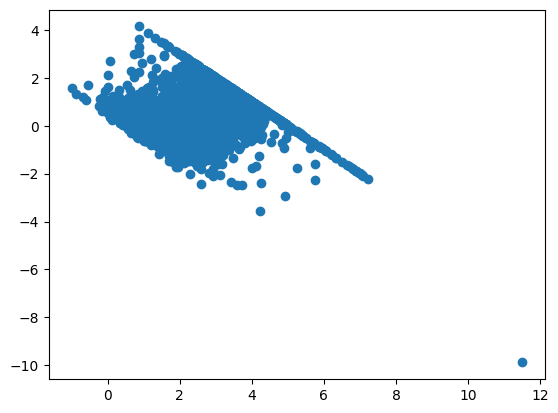

In [27]:
## Scatter plot with respect to prediction and residuals
## uniform distribution

plt.scatter(y_pred,residuals)

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(f'MAE : {mean_absolute_error(y_test,y_pred)}')
print(f'MSE : {mean_squared_error(y_test,y_pred)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))}')

MAE : 0.5272474538305952
MSE : 0.5305677824766754
RMSE : 0.7284008391515453


### Metrics - R Square and Adjusted R Square

In [29]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(f'R squared score : {score}')

R squared score : 0.5957702326061662


In [30]:
#display adjusted R-squared
adj_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'Adjusted R squared score : {adj_score}')

Adjusted R squared score : 0.5952472117200025


### Prediction on New Data

In [31]:
df.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [32]:
##transformation of new data
scaler.transform(df.data[0].reshape(1,-1))

array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

In [33]:
regression.predict(scaler.transform(df.data[0].reshape(1,-1)))

array([4.14333441])

### Pickling the Model file for Deployment

In [34]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [35]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [36]:
## Prediction
pickled_model.predict(scaler.transform(df.data[0].reshape(1,-1)))

array([4.14333441])